# 3.1 Basic of exploratory data analysis with 🐼

In this notebook, we will focus on another essential skill in data analysis, namely the ability to get insights about a dataset by means of plotting and summary statistics.

### `describe()`

In [383]:
# the default behavior is to include only
# column with numerical values


df.describe()

,week_day,day_hour,n_mentions,year
count,2819.000000,2819.000000,2819.000000,2819.000000
mean,3.196169,12.782547,0.807733,2014.777226
std,1.946637,7.611198,0.859091,1.687017
min,0.000000,0.000000,0.000000,2010.000000
25%,2.000000,5.000000,0.000000,2013.000000
50%,3.000000,15.000000,1.000000,2015.000000
75%,5.000000,19.000000,1.000000,2016.000000
max,6.000000,23.000000,6.000000,2017.000000


In [ ]:
# in this case fails as pandas does not know
# how to handle a column with values of type list (fair enough)

df.describe(include='all')

In [386]:
# that's a workaround to include all other columns

df.describe(exclude=[list])

,created_at,week_day,day_hour,n_mentions,year
count,2819,2819.000000,2819.000000,2819.000000,2819.000000
unique,2819,NaN,NaN,NaN,NaN
top,2013-02-21 06:48:55,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2010-06-04 18:31:57,NaN,NaN,NaN,NaN
last,2017-04-05 14:56:29,NaN,NaN,NaN,NaN
mean,NaN,3.196169,12.782547,0.807733,2014.777226
std,NaN,1.946637,7.611198,0.859091,1.687017
min,NaN,0.000000,0.000000,0.000000,2010.000000
25%,NaN,2.000000,5.000000,0.000000,2013.000000


In [320]:
df.created_at.describe()

count                    2819
unique                   2819
top       2013-02-21 06:48:55
freq                        1
first     2010-06-04 18:31:57
last      2017-04-05 14:56:29
Name: created_at, dtype: object

In [387]:
df['week_day_name'] = df['week_day_name'].astype('category')

In [389]:
df.describe(exclude=['object'])

,created_at,week_day,day_hour,n_mentions,year,week_day_name
count,2819,2819.000000,2819.000000,2819.000000,2819.000000,2819
unique,2819,NaN,NaN,NaN,NaN,7
top,2013-02-21 06:48:55,NaN,NaN,NaN,NaN,Friday
freq,1,NaN,NaN,NaN,NaN,530
first,2010-06-04 18:31:57,NaN,NaN,NaN,NaN,NaN
last,2017-04-05 14:56:29,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.196169,12.782547,0.807733,2014.777226,NaN
std,NaN,1.946637,7.611198,0.859091,1.687017,NaN
min,NaN,0.000000,0.000000,0.000000,2010.000000,NaN
25%,NaN,2.000000,5.000000,0.000000,2013.000000,NaN


### Plotting

In [334]:
%matplotlib inline

import matplotlib.pyplot as plt

#### Histograms

They are useful to see the distribution of a certain variable in your dataset.

In [184]:
df.groupby(['n_mentions'])[['text']].count()

,text
n_mentions,
0,1145
1,1231
2,329
3,78
4,28
5,6
6,2


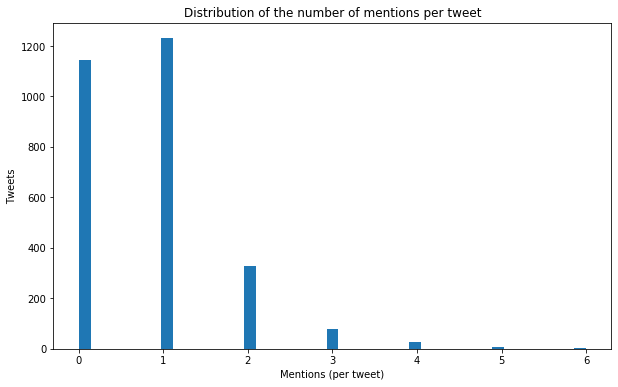

In [185]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(df.n_mentions, bins='auto', rwidth=1.0)
plt.title('Distribution of the number of mentions per tweet')
plt.ylabel("Tweets")
plt.xlabel("Mentions (per tweet)")
plt.show()

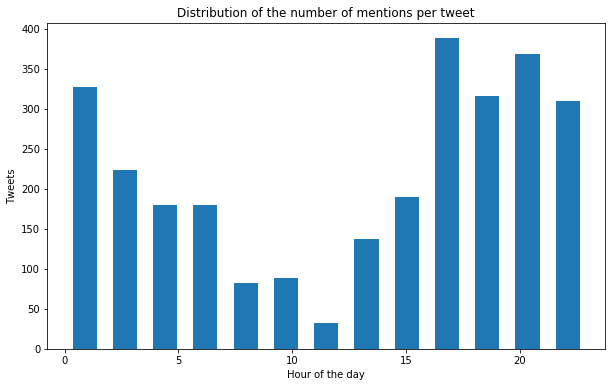

In [187]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(df.day_hour, bins='auto', rwidth=0.6)
plt.title('Distribution of the number of mentions per tweet')
plt.ylabel("Tweets")
plt.xlabel("Hour of the day")
plt.show()

In [188]:
df_2017 = df[df.created_at.dt.year == 2017]

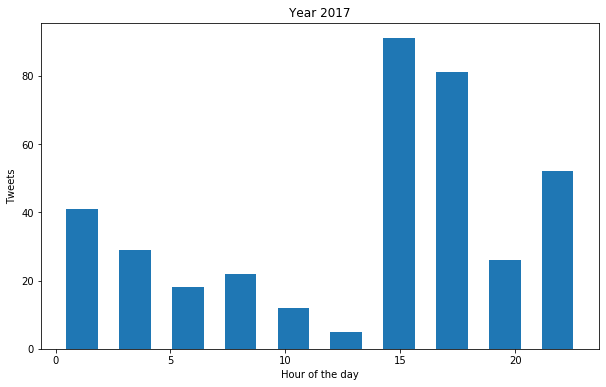

In [189]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(df_2017.day_hour, bins='auto', rwidth=0.6)
plt.title('Year 2017')
plt.ylabel("Tweets")
plt.xlabel("Hour of the day")
plt.show()

So far we have used directly `matplotlib` to generate our plots.

`pandas`'s dataframes provide some methods that directly call `matplotlib`'s API behind the scenes:
- `hist()` for histograms
- `boxplot()` for boxplots
- `plot()` for other types of plots (specified with e.g. `any='scatter'`)

By passing the `by` parameter to e.g. `hist()` it is possible to produce one histogram plot of a given variable for each value in another column.

Let's see how we can plot the number of mentions by year:

In [335]:
df['year'] = df.created_at.dt.year

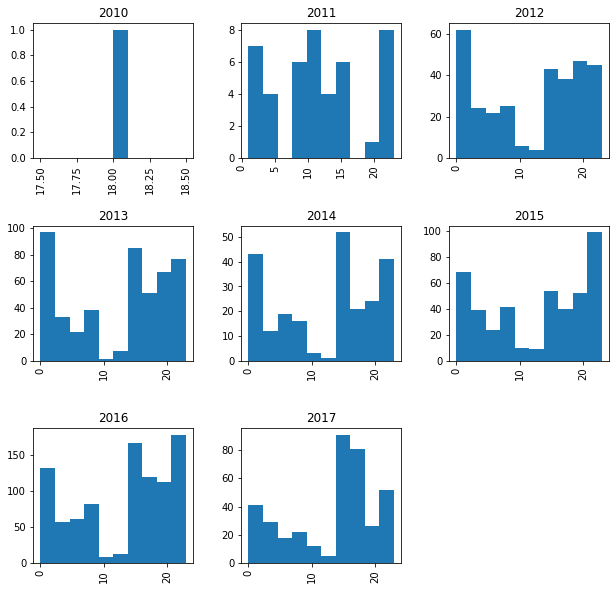

In [356]:
axes = df.hist(column='day_hour', by='year', figsize=(10,10))

#### Scatter plots

They are useful to plot the relation between two variables in your dataset.

In [176]:
df.head(3)

,created_at,text,tweet_link,week_day,day_hour,tweet_mentions,n_mentions
id,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,Wednesday,14,[],0
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,Monday,20,"[@ForIn2020, @waltmossberg, @mims, @defcon_5]",4
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,Monday,16,"[@waltmossberg, @mims, @defcon_5]",3


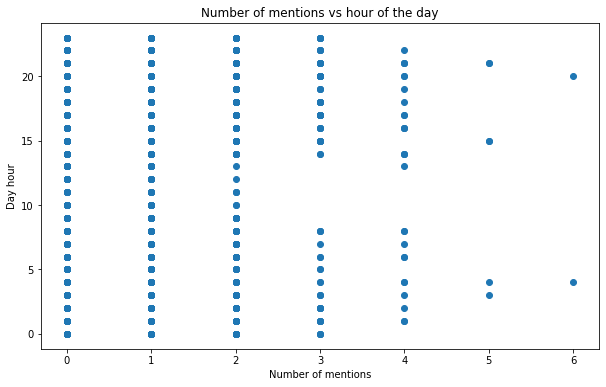

In [357]:
%matplotlib inline
plt.figure(figsize=(10, 6))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df.n_mentions, df.day_hour)

# give a title to the plot
plt.title('Number of mentions vs hour of the day')

# give a label to the axes
plt.ylabel("Day hour")
plt.xlabel("Number of mentions")
plt.show()

#### Bar charts

They are useful to plot categorical data.

In [170]:
plt.bar?

In [343]:
tweets_by_weekday = df.groupby(df.created_at.dt.weekday)[['text']].count()

In [344]:
week_days = [
    "Mon",
    "Tue",
    "Wed",
    "Thur",
    "Fri",
    "Sat",
    "Sun"
]

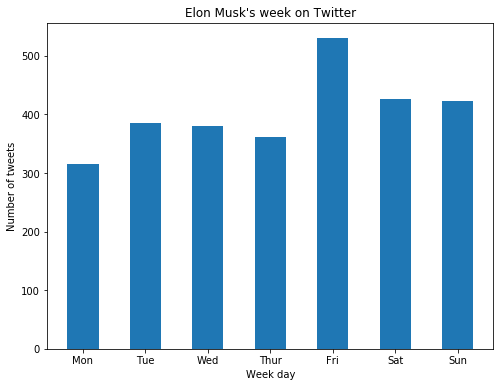

In [360]:
%matplotlib inline
plt.figure(figsize=(8, 6))

# specify the type of plot and the labels
# for the y axis (the bars)
plt.bar(
    tweets_by_weekday.index,
    tweets_by_weekday.text,
    tick_label=week_days,
    width=0.5
)

# give a title to the plot
plt.title('Elon Musk\'s week on Twitter')

# give a label to the axes
plt.ylabel("Number of tweets")
plt.xlabel("Week day")
plt.show()

#### Box plots

![box plot explained](./figures/eda-boxplot.png)

In [346]:
tweets_by_weekday

,text
created_at,
0,315
1,385
2,380
3,361
4,530
5,426
6,422


In [347]:
tweets_by_weekday.describe()

,text
count,7.000000
mean,402.714286
std,67.551744
min,315.000000
25%,370.500000
50%,385.000000
75%,424.000000
max,530.000000


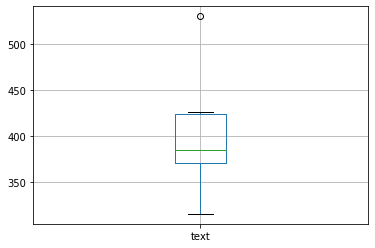

In [349]:
tweets_by_weekday.boxplot()

In [175]:
plt.bar?

In [222]:
df.head(3)

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day,day_hour
id,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,[],0,2,14
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"[@ForIn2020, @waltmossberg, @mims, @defcon_5]",4,0,20
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"[@waltmossberg, @mims, @defcon_5]",3,0,16


In [351]:
df[['day_hour']].describe()

,day_hour
count,2819.000000
mean,12.782547
std,7.611198
min,0.000000
25%,5.000000
50%,15.000000
75%,19.000000
max,23.000000


In [354]:
df[['day_hour']].quantile(.25)

day_hour    5.0
Name: 0.25, dtype: float64

In [247]:
df.boxplot?

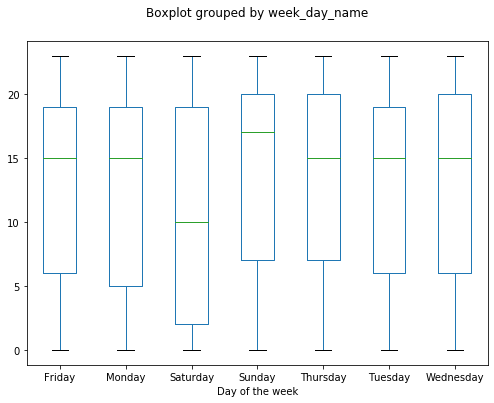

In [251]:
%matplotlib inline

df[['day_hour', 'week_day_name']].boxplot(
    by='week_day_name',
    grid=False,
    figsize=(8,6),
    fontsize=10
)

# give a title to the plot
plt.title('')

# give a label to the axes
plt.xlabel("Day of the week")
plt.show()

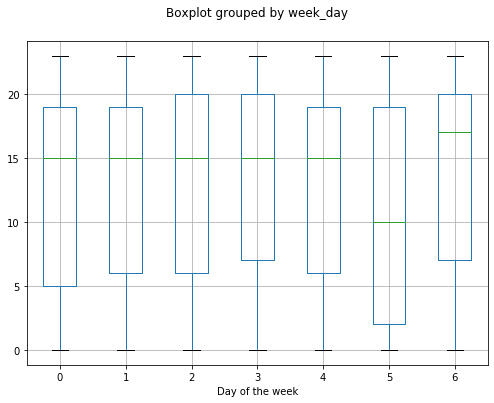

In [252]:
%matplotlib inline

df[['day_hour', 'week_day']].boxplot(
    by='week_day',
    grid=True, # just to show the difference with/without
    figsize=(8,6),
    fontsize=10
)

# give a title to the plot
plt.title('')

# give a label to the axes
plt.xlabel("Day of the week")
plt.show()